# ממ"ן 11 
מגיש: נועם שדה

## שאלה 2 סעיף ג

ישנם הרבה ערכים בהם המערכת יציבה (אך לא סטטית). לדוגמא: כאשר קצב התפשטות זיהום האוויר הוא נמוך וכאשר הזיהום ההתחלתי אפסי. אם מתקיים התנאים הבאים אז הטמפרטורה הכללית של התאים תישאר כמעט קבועה לאורך שנה.
 

 "air_pollution_factor"=0

 "starting_air_pollution"=0

## סעיף ג'1:

להלן טווח ערכים בהם המערכת יציבה אך לא סטטית, ממוצע הערכים וסטיית התקן

In [1]:
from main import App
from Cell import ALL_TEMP_STATS, ALL_AIR_POLLUTION_STATS
from statistics import mean, stdev

In [2]:
app = App(starting_air_pollution=0, air_pollution_factor=0.15)
app.window.mainloop()
print("[Temperature]\t\tMax: {:.2f}\tMin: {:.2f}\tAvg: {:.2f}\tStd. Dev: {:.2f}".format(max(ALL_TEMP_STATS),
                                                                                            min(ALL_TEMP_STATS),
                                                                                            mean(ALL_TEMP_STATS),                                           
                                                                                            stdev(ALL_TEMP_STATS)))                                                                                               
print("[Air Pollution]\t\tMax: {:.2f}\tMin: {:.2f}\tAvg: {:.2f}\tStd. Dev: {:.2f}".format(
        max(ALL_AIR_POLLUTION_STATS), min(ALL_AIR_POLLUTION_STATS), mean(ALL_AIR_POLLUTION_STATS),
        stdev(ALL_AIR_POLLUTION_STATS)))

[Temperature]		Max: 68.00	Min: -22.00	Avg: 13.59	Std. Dev: 11.04
[Air Pollution]		Max: 85.60	Min: 0.00	Avg: 1.00	Std. Dev: 3.98


## סעיף ג'2:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def plot_graph(file_name):
    stats = []
    f = open(file_name, 'r')
    for n in f:
        stats.append(float(n))
    avg = mean(stats)
    std = stdev(stats)
    for i in range(len(stats)): #normalize the data
        stats[i] = (stats[i]-avg) / std
    x = list(range(0,len(stats)))
    plt.plot(x,stats)
    plt.xlabel('days')
    plt.ylabel('temprature')
    plt.title('Temprature over the year')
    plt.grid()

    #add trendline to plot
    z = np.polyfit(x, stats, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color="blue" ,linestyle="--")
    plt.show()

להלן גרף העוקב אחרי הפרמטרים לאורך השנה. לצורך כך עשיתי ממוצע בין של כל הפרמטרים בכל דור, ולאחר מכן נירמלתי את הנתונים.

גרף הטמפרטורה לאורך השנה:

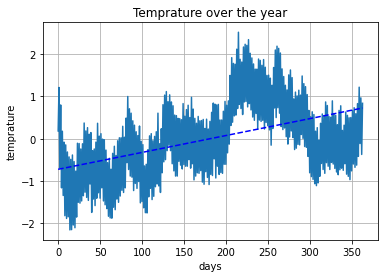

In [9]:
plot_graph('temp.txt')

גרף זיהום האוויר לאורך השנה:

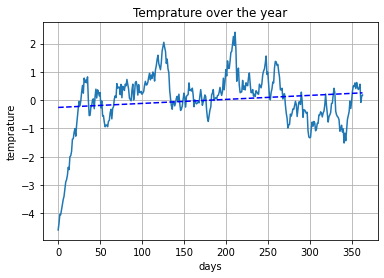

In [10]:
plot_graph('air.txt')

## סעיף ד1

נבדוק את הקורלציה של זיהום האוויר ביחס לטמרטורה

In [11]:
import pandas as pd
pollution = []
temp = []
f = open('temp.txt', 'r')
for n in f:
    temp.append(float(n))
f = open('air.txt', 'r')
for n in f:
    pollution.append(float(n))
data = {'Pollution': pollution,'Tempature': temp}
df = pd.DataFrame(data)
df.corr()

,Pollution,Tempature
Pollution,1.000000,0.252282
Tempature,0.252282,1.000000


ניתן לראות שיש קורלציה חיובית בין הטמפרטורה וזיהום האוויר.
כלומר כאשר זיהום האוויר גדל גם הטמפרטורה עולה.
כתוצאה מעליית הטמפרטורה קרחונים נמסים, יערות וערים הופכים לאדמה, ובכך זיהום האוויר הורס את הטבע 


## סעיף ד2

כעט נבדוק את רגישות המערכת לפרמטר זיהום האוויר כאשר זיהום האוויר ההתחלתי שונה:

In [12]:
app = App(starting_air_pollution=10, air_pollution_factor=0.15)
app.window.mainloop()
print("[Temperature]\t\tMax: {:.2f}\tMin: {:.2f}\tAvg: {:.2f}\tStd. Dev: {:.2f}".format(max(ALL_TEMP_STATS),
                                                                                            min(ALL_TEMP_STATS),
                                                                                            mean(ALL_TEMP_STATS),                                           
                                                                                            stdev(ALL_TEMP_STATS)))                                                                                               
print("[Air Pollution]\t\tMax: {:.2f}\tMin: {:.2f}\tAvg: {:.2f}\tStd. Dev: {:.2f}".format(
        max(ALL_AIR_POLLUTION_STATS), min(ALL_AIR_POLLUTION_STATS), mean(ALL_AIR_POLLUTION_STATS),
        stdev(ALL_AIR_POLLUTION_STATS)))

[Temperature]		Max: 70.00	Min: -22.00	Avg: 13.64	Std. Dev: 11.17
[Air Pollution]		Max: 100.00	Min: 0.00	Avg: 1.44	Std. Dev: 4.41


כתוצאה משינוי זה ממוצע הטמפרטורה לא השתנה בהרבה וכך גם המערכת לא השתנה. זאת אומרת שזיהום האוויר ההתחלתי לא משפיע במידה ניכרת על המערכת.
אך כאשר נגדיל את הפרמטר

"air_pollution_factor"

זה יגרום לשינוי דרסטי במערכת כי זיהום האוויר יתפשט הרבה יותר מהר

In [15]:
app= App(starting_air_pollution=0, air_pollution_factor=0.25)
app.window.mainloop()
print("[Temperature]\t\tMax: {:.2f}\tMin: {:.2f}\tAvg: {:.2f}\tStd. Dev: {:.2f}".format(max(ALL_TEMP_STATS),
                                                                                            min(ALL_TEMP_STATS),
                                                                                            mean(ALL_TEMP_STATS),                                           
                                                                                            stdev(ALL_TEMP_STATS)))                                                                                               
print("[Air Pollution]\t\tMax: {:.2f}\tMin: {:.2f}\tAvg: {:.2f}\tStd. Dev: {:.2f}".format(
        max(ALL_AIR_POLLUTION_STATS), min(ALL_AIR_POLLUTION_STATS), mean(ALL_AIR_POLLUTION_STATS),
        stdev(ALL_AIR_POLLUTION_STATS)))

[Temperature]		Max: 70.00	Min: -22.00	Avg: 20.19	Std. Dev: 20.07
[Air Pollution]		Max: 100.00	Min: 0.00	Avg: 12.25	Std. Dev: 25.69


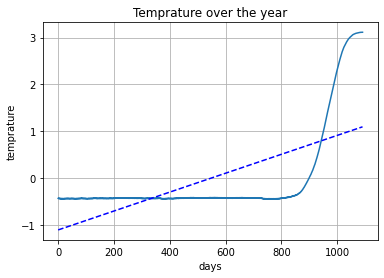

In [16]:
plot_graph('temp.txt')

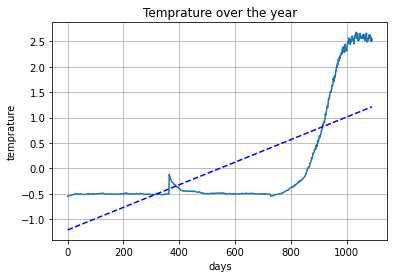

In [17]:
plot_graph('air.txt')

הטמפרטורה הממוצעת גבוהה בהרבה מהמקרים הקודמים, הגרפים גדלים בקצב אקספוננציאל. מכך נסיק כי פרמטר קצב התפשטות זיהום האוויר משפיע הכי הרבה על המערכת. הקרחונים נמסו, היערות הפכות לאדמות, וחלק 

## לסיכום:

השערתנו נכונה והמערכת רגישה לזיהום אוויר לפי סעיפים ד1 וד2.
שינוי קל בזיהום האוויר גורם לעליה בטמפרטורה הכללית באוטומט וכתוצאה מכך נגרם שינוי דרמטי במערכת.